<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install yfinance --q

[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  1 of 1 completed


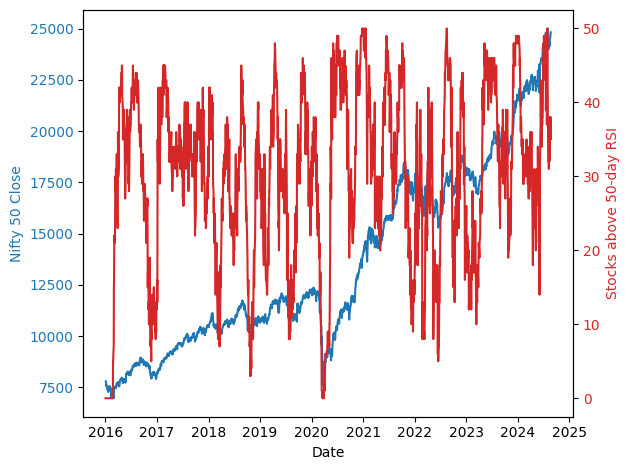

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the function to calculate RSI
def calculate_rsi(data):
    price_diff = data.diff()
    gains = price_diff.mask(price_diff < 0, 0)
    losses = -price_diff.mask(price_diff > 0, 0)
    avg_gain = gains.rolling(window=37).mean()
    avg_loss = losses.rolling(window=37).mean()
    relative_strength = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + relative_strength))
    return rsi
#ind_niftynext50list # ind_niftybanklist  #ind_nifty50list
# Fetch Nifty 50 constituents
nifty50_url = "https://archives.nseindia.com/content/indices/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
#tickers=['reliance.ns','tcs.ns','hdfcbank.ns','icicibank.ns','bhartiartl.ns','sbin.ns','infy.ns','lici.ns','hindunilvr.ns','itc.ns','lt.ns','bajfinance.ns','hcltech.ns','axisbank.ns','maruti.ns']

# Fetch historical data
start_date = "2016-01-01"
data = yf.download(tickers, start=start_date)['Adj Close']

# Calculate the RSI for each stock
rsi_data = data.apply(calculate_rsi)

# Check if RSI > 50
rsi_above_50 = rsi_data > 50

# Count the number of stocks having RSI > 50
num_stocks_above_50 = rsi_above_50.sum(axis=1)

# Fetch Nifty 50 index data
nifty50_data = yf.download("^NSEI", start=start_date)['Adj Close']

# Plot Nifty 50 close and cumulative count of stocks above 50-day moving average
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Stocks above 50-day RSI', color='tab:red')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50, color='tab:red', label='Stocks above 50-day RSI')
ax2.tick_params(axis='y', labelcolor='tab:red')
#ax2.axhline(y=18)
fig.tight_layout()
plt.show()

In [3]:
num_stocks_above_50=num_stocks_above_50.tail(1600)
nifty50_data=nifty50_data.tail(1600)

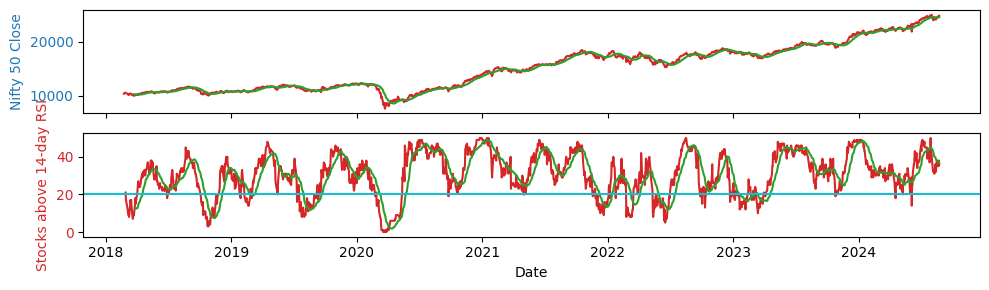

In [4]:
# Plot Nifty 50 close and cumulative count of stocks above 50-day moving average in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,3), sharex=True)

ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:red', label='Nifty 50 Close')
ax1.plot(nifty50_data.index, nifty50_data.rolling(window=20).mean(), color='tab:green', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.set_xlabel('Date')
ax2.set_ylabel('Stocks above 14-day RSI', color='tab:red')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50, color='tab:red', label='Stocks above 14-day RSI')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50.rolling(window=20).mean(), color='tab:green', label='Mavg 20')
ax2.axhline(y=20,color='tab:cyan')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Show the plot
plt.show()

In [5]:
num_stocks_above_50=num_stocks_above_50.tail(800)
nifty50_data=nifty50_data.tail(800)

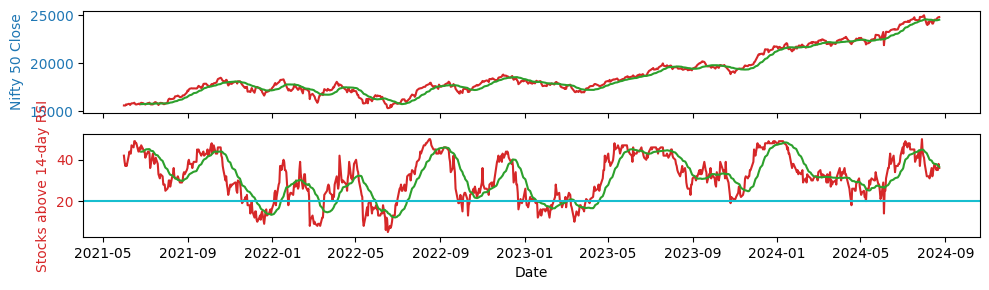

In [6]:
# Plot Nifty 50 close and cumulative count of stocks above 50-day moving average in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,3), sharex=True)

ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:red', label='Nifty 50 Close')
ax1.plot(nifty50_data.index, nifty50_data.rolling(window=20).mean(), color='tab:green', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.set_xlabel('Date')
ax2.set_ylabel('Stocks above 14-day RSI', color='tab:red')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50, color='tab:red', label='Stocks above 14-day RSI')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50.rolling(window=20).mean(), color='tab:green', label='Mavg 20')
ax2.axhline(y=20,color='tab:cyan')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Show the plot
plt.show()

In [7]:
num_stocks_above_50=num_stocks_above_50.tail(150)
nifty50_data=nifty50_data.tail(150)

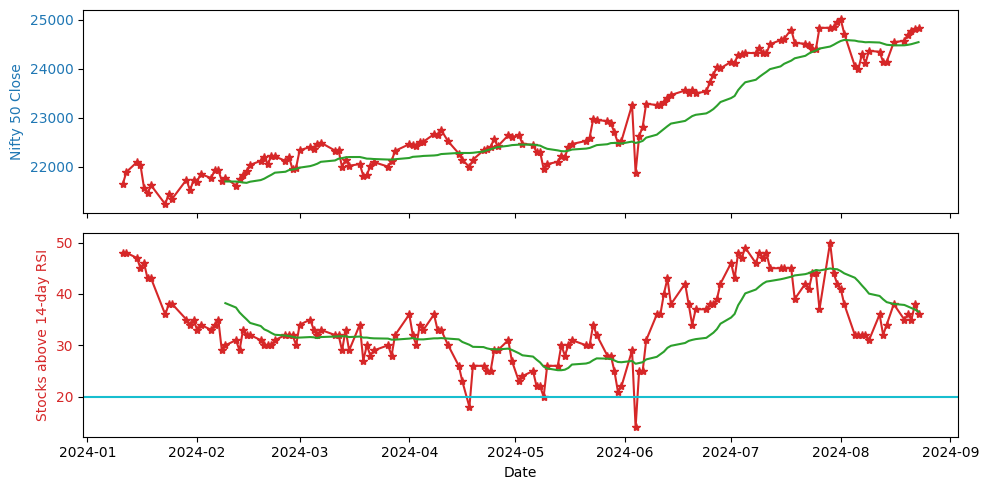

In [8]:
# Plot Nifty 50 close and cumulative count of stocks above 50-day moving average in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,5), sharex=True)
ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:red', label='Nifty 50 Close', marker='*')
ax1.plot(nifty50_data.index, nifty50_data.rolling(window=20).mean(), color='tab:green', label='Nifty 50 Close Rolling Mean')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.set_xlabel('Date')
ax2.set_ylabel('Stocks above 14-day RSI', color='tab:red')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50, color='tab:red', label='Stocks above 14-day RSI',marker='*')
ax2.plot(num_stocks_above_50.index, num_stocks_above_50.rolling(window=20).mean(), color='tab:green', label='Mavg 20')
ax2.axhline(y=20,color='tab:cyan')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Show the plot
plt.show()